# Midterm Presentation
**ESADE MIBA 2022/23 Capstone Team G03**

*John Bergmann, Florian Blaser, Enrique Mendez, Michael Merheb, Jingshi Zhang*

## Setup

### Imports

In [1]:
# Local Modules
from etl_pipeline.link_extractor import Google, Bing, Yahoo, get_all_links
from etl_pipeline.content_extractor import get_content

# Other Imports
import nltk
import pandas as pd
import string
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Global Variables

In [2]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

search_term = "Credit Suisse"

### Functions

In [3]:
def clean_text(t):
    
    # remove numbers
    t = "".join([i for i in t if not i.isdigit()])

    # remove extra whitespaces and new lines
    t = t.replace("\n", "").strip()

    # remove punctuation 
    t = "".join ([c for c in t if c not in string.punctuation])

    # tokenization
    t = tokenizer.tokenize(t.lower())

    # remove stop words
    t = [word for word in t if word not in stopwords.words("english")]

    # lematization
    t = [lemmatizer.lemmatize(i) for i in t]

    return " ".join(t)


## Link Extraction

### Single Search Engines

In [4]:
google = Google(company=search_term)
bing = Bing(company=search_term)
yahoo = Yahoo(company=search_term)

#### Google

In [5]:
google_links = google.get_links(max_articles=20)
google_links = pd.DataFrame(google_links)
google_links.head()

,engine,se_link,se_title,se_source
0,Google,https://www.cnn.com/2023/04/18/intl_business/c...,Credit Suisse limited investigations into Nazi...,
1,Google,https://www.ft.com/content/32640237-3c0b-4c87-...,US senators criticise Credit Suisse over Nazi ...,Financial Times
2,Google,https://www.nytimes.com/2023/04/18/us/credit-s...,Beleaguered Swiss Bank Accused of Impeding Hun...,The New York Times
3,Google,https://www.bloomberg.com/news/articles/2023-0...,AT1 Bond Market Rouses With Sale After Credit ...,Bloomberg.com
4,Google,https://www.reuters.com/markets/rates-bonds/sm...,SMFG becomes first big Japan bank to sell AT1 ...,Reuters


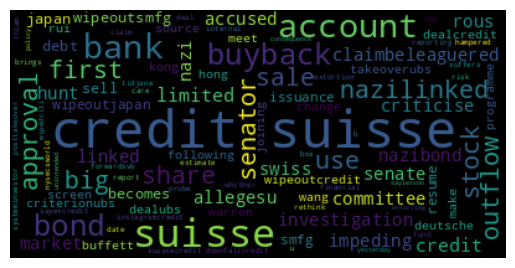

In [6]:
google_titles = google_links["se_title"].apply(clean_text).str.cat()
wordcloud = WordCloud().generate(google_titles)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Bing

In [7]:
bing_links = bing.get_links(20)
bing_links = pd.DataFrame(bing_links)
bing_links.head()

,engine,se_link,se_title,se_source
0,Bing,https://www.msn.com/en-us/money/companies/cred...,Credit Suisse limited investigations into Nazi...,CNN on MSN
1,Bing,https://www.forbes.com/sites/georgebradt/2023/...,A Lesson From Credit Suisse On The Unintended ...,Forbes
2,Bing,https://www.msn.com/en-xl/money/topstories/smf...,SMFG becomes first big Japan bank to sell AT1 ...,Reuters on MSN
3,Bing,https://www.ft.com/content/32640237-3c0b-4c87-...,US senators criticise Credit Suisse over Nazi ...,The Financial Times
4,Bing,https://www.msn.com/en-ca/money/topstories/cre...,Credit Suisse hampered internal probe into Naz...,Reuters on MSN


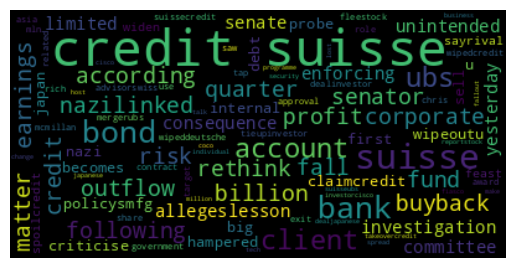

In [8]:
bing_titles = bing_links["se_title"].apply(clean_text).str.cat()
wordcloud = WordCloud().generate(bing_titles)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Yahoo

In [9]:
yahoo_links = yahoo.get_links(20)
yahoo_links = pd.DataFrame(yahoo_links)
yahoo_links.head()

,engine,se_link,se_title,se_source
0,Yahoo,https://www.msn.com/en-ca/money/topstories/smf...,SMFG becomes first big Japan bank to sell AT1 ...,MSN News
1,Yahoo,https://www.wsj.com/articles/credit-suisse-fai...,"Credit Suisse Failed to Probe Nazi Past, Senat...",The Wall Street Journal
2,Yahoo,https://www.msn.com/en-us/money/markets/credit...,Credit Suisse rescue package rejected by Swiss...,MSN News
3,Yahoo,https://finance.yahoo.com/news/1-billion-sale-...,$1 Billion Sale Marks First Major Bank’s AT1 B...,Bloomberg via Yahoo Finance
4,Yahoo,https://www.digitaljournal.com/pr/news/credit-...,CREDIT SUISSE GROUP AG (NYSE: CS) SHAREHOLDER ...,Digital Journal


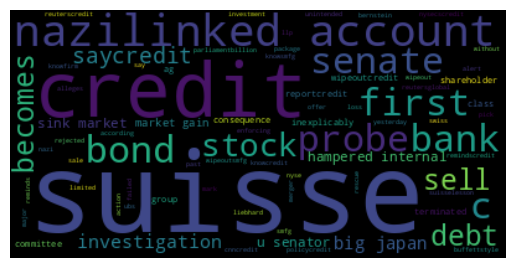

In [10]:
yahoo_titles = yahoo_links["se_title"].apply(clean_text).str.cat()
wordcloud = WordCloud().generate(yahoo_titles)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Multi Search Engines

In [11]:
google_bing_links = get_all_links(company=search_term, engines=[Google, Bing], max_articles=20) #20 Articles each from Yahoo and Bing -> 40 total
google_bing_links = pd.DataFrame(google_bing_links)
google_bing_links.head()

,engine,se_link,se_title,se_source
0,Bing,https://www.msn.com/en-us/money/companies/cred...,Credit Suisse limited investigations into Nazi...,CNN on MSN
1,Bing,https://www.forbes.com/sites/georgebradt/2023/...,A Lesson From Credit Suisse On The Unintended ...,Forbes
2,Bing,https://www.msn.com/en-xl/money/topstories/smf...,SMFG becomes first big Japan bank to sell AT1 ...,Reuters on MSN
3,Bing,https://www.ft.com/content/32640237-3c0b-4c87-...,US senators criticise Credit Suisse over Nazi ...,The Financial Times
4,Bing,https://www.msn.com/en-ca/money/topstories/cre...,Credit Suisse hampered internal probe into Naz...,Reuters on MSN


In [13]:
google_bing_links.tail()

,engine,se_link,se_title,se_source
35,Google,https://www.reuters.com/breakingviews/rivals-c...,Breakingviews - Rivals can feast on Credit Sui...,Reuters
36,Google,https://www.reuters.com/business/finance/credi...,Credit Suisse hampered internal probe into Naz...,Reuters
37,Google,https://www.nytimes.com/2023/04/18/us/credit-s...,Beleaguered Swiss Bank Accused of Impeding Hun...,The New York Times
38,Google,https://www.forbes.com/sites/georgebradt/2023/...,A Lesson From Credit Suisse On The Unintended ...,Forbes
39,Google,https://www.axios.com/2023/04/18/credit-suisse...,A Swiss bank held nearly 100 Nazi-linked accou...,Axios


### Filter by Dates

**Note**: This only works for Google

In [14]:
# Show only Google Search Engine
google_2018_2020 = Google(company=search_term, start_date="20180101", end_date="20200101")

In [15]:
google_links_2018_2020 = google_2018_2020.get_links(20)
google_links_2018_2020 = pd.DataFrame(google_links_2018_2020)
google_links_2018_2020.head()

,engine,se_link,se_title,se_source
0,Google,https://www.cnn.com/2019/10/01/business/credit...,One of Credit Suisse's top executives has quit...,CNN
1,Google,https://www.nytimes.com/2019/10/01/business/de...,Spying Scandal at Credit Suisse Leads to Top E...,The New York Times
2,Google,https://www.reuters.com/article/us-credit-suis...,Investigator at center of Credit Suisse spying...,Reuters
3,Google,https://www.cnn.com/2019/12/23/business/credit...,Credit Suisse blames former executive for seco...,CNN
4,Google,https://www.reuters.com/article/uk-credit-suis...,Second Credit Suisse spying probe expected to ...,Reuters


In [16]:
google_links_2018_2020["se_link"].iloc[3]

'https://www.cnn.com/2019/12/23/business/credit-suisse-second-spying-scandal/index.html'

## Full Search

### Link Extraction

In [17]:
all_links = get_all_links(company=search_term)
all_links = pd.DataFrame(all_links)
all_links.head()

,engine,se_link,se_title,se_source
0,Bing,https://www.bloomberg.com/news/articles/2023-0...,Credit Suisse Accused of Hindering Probe Into ...,Bloomberg L.P.
1,Bing,https://www.msn.com/en-us/money/companies/cred...,Credit Suisse limited investigations into Nazi...,CNN on MSN
2,Bing,https://www.forbes.com/sites/georgebradt/2023/...,A Lesson From Credit Suisse On The Unintended ...,Forbes
3,Bing,https://www.msn.com/en-xl/money/topstories/smf...,SMFG becomes first big Japan bank to sell AT1 ...,Reuters on MSN
4,Bing,https://www.ft.com/content/32640237-3c0b-4c87-...,US senators criticise Credit Suisse over Nazi ...,The Financial Times


In [18]:
all_links["engine"].value_counts()

Google    303
Yahoo     290
Bing      203
Name: engine, dtype: int64

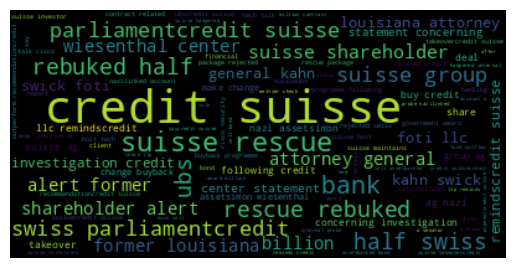

In [19]:
se_titles = all_links["se_title"].apply(clean_text).str.cat()
wordcloud = WordCloud().generate(se_titles)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Content Extraction

In [20]:
all_text = get_content(all_links["se_link"].drop_duplicates().to_list())
all_text = pd.DataFrame(all_text)
all_text.head()

Getting news article info:  21%|██        | 134/649 [00:17<01:51,  4.62it/s]encoding error : input conversion failed due to input error, bytes 0x21 0x00 0x00 0x00
encoding error : input conversion failed due to input error, bytes 0x44 0x00 0x00 0x00
I/O error : encoder error
Getting news article info: 100%|██████████| 649/649 [01:51<00:00,  5.82it/s]


,n3k_link,n3k_title,n3k_body,n3k_author,n3k_published,bs_link,bs_title,bs_body
0,https://www.businessinsider.com/investing-stoc...,These 15 stocks will matter the most to corpor...,Markets are preparing for a second straight qu...,[James Faris],2023-04-17 00:00:00,https://www.businessinsider.com/investing-stoc...,These 15 stocks will matter the most to corpor...,Negative earnings momentum will carry into the...
1,https://www.bloomberg.com/news/articles/2023-0...,Are you a robot?,Why did this happen?\n\nPlease make sure your ...,[],2023-04-18 00:00:00,https://www.bloomberg.com/news/articles/2023-0...,Bloomberg,Please make sure your browser supports JavaScr...
2,https://www.bloomberg.com/news/articles/2023-0...,Are you a robot?,Why did this happen?\n\nPlease make sure your ...,[],2023-04-19 00:00:00,https://www.bloomberg.com/news/articles/2023-0...,Bloomberg,Please make sure your browser supports JavaScr...
3,https://www.ft.com/content/32640237-3c0b-4c87-...,Subscribe to read,What is included in my trial?\n\nDuring your t...,[],None,https://www.ft.com/content/32640237-3c0b-4c87-...,\nUS senators criticise Credit Suisse over Naz...,During your trial you will have complete digit...
4,https://www.forbes.com/sites/georgebradt/2023/...,A Lesson From Credit Suisse On The Unintended ...,Shadows of Credit Suisse AFP via Getty Images\...,"[George Bradt, Senior Contributor]",2023-04-18 00:00:00,https://www.forbes.com/sites/georgebradt/2023/...,A Lesson From Credit Suisse On The Unintended ...,Things change – often rapidly. High performing...


In [23]:
all_text.tail()

,n3k_link,n3k_title,n3k_body,n3k_author,n3k_published,bs_link,bs_title,bs_body
503,https://asia.nikkei.com/Business/Markets/Bonds...,Japan's SMFG to issue $1bn in AT1 bonds,TOKYO -- Japan's Sumitomo Mitsui Financial Gro...,[],None,https://asia.nikkei.com/Business/Markets/Bonds...,Japan's SMFG to issue $1bn in AT1 bonds,TOKYO -- Japan's Sumitomo Mitsui Financial Gro...
504,https://www.privatebankerinternational.com/new...,UBS reportedly looking to abort Credit Suisse ...,UBS is planning to hold discussions with veter...,[],2023-03-23 08:28:33+00:00,https://www.privatebankerinternational.com/new...,UBS reportedly looking to abort Credit Suisse ...,UBS is planning to hold discussions with veter...
505,https://www.wsj.com/articles/credit-suisses-me...,Credit Suisse’s Message to Bank Clients: No Ne...,Credit Suisse Group AG has told its bankers to...,[Weilun Soon],None,https://www.wsj.com/articles/credit-suisses-me...,\n Credit Suisse’s Message to Bank Clients:...,We are delighted that you'd like to resume you...
506,https://www.efinancialcareers.com/news/2023/03...,Morning Coffee: UBS bankers fear “rancid” Cred...,If anyone has any doubts about UBS bankers ent...,"[Sarah Butcher, Global Editor]",2023-03-24 09:50:00+00:00,https://www.efinancialcareers.com/news/2023/03...,Morning Coffee: UBS bankers fear “rancid” Cred...,If anyone has any doubts about UBS bankers ent...
507,https://www.washingtonpost.com/business/2023/0...,Credit Suisse to borrow up to $53.7 billion fr...,Shares of Credit Suisse plunged on March 15 as...,"[Jeanne Whalen, Rachel Lerman, Steven Mufson]",2023-03-15 00:00:00,https://www.washingtonpost.com/business/2023/0...,Credit Suisse to borrow up to $53.7 billion fr...,"Compounding Credit Suisse’s problems, the bank..."


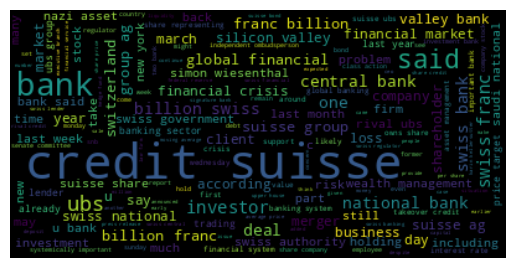

In [21]:
n3k_bodies = all_text["n3k_body"].apply(clean_text).str.cat()
wordcloud = WordCloud().generate(n3k_bodies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

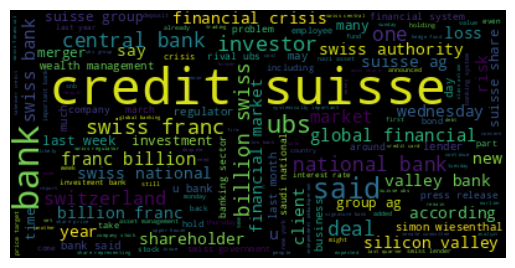

In [22]:
bs_bodies = all_text["bs_body"].apply(clean_text).str.cat()
wordcloud = WordCloud().generate(bs_bodies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()